## Gradient Descent

### Introduction

#####   Gradient descent 

Is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model. Parameters refer to coefficients in Linear Regression.

#### Objective
 Predict the MPG by using 5 predictors from Cars dataset.

In [16]:
# Importing the required libraries

import statsmodels.api as stm
import scipy.stats as stats
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [17]:
# Changing to current directory

import os
os.chdir(r"C:\Users\kusum\Desktop\Python")

In [18]:
#Reading the cars.csv data

import pandas as pd
cars = pd.read_csv("cars.csv")

#### Feature Scaling or Standardization:

It is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.

In [126]:
# Min-max normalization (feature-scaling) for multi-linear regression

car_scaled=cars[['MPG','Weight','Horsepower','Cylinders','Acceleration','Displacement']].apply(lambda x: (x-np.min(x))/(np.max(x)-np.min(x)))

In [127]:
car_scaled.head(3)

,MPG,Weight,Horsepower,Cylinders,Acceleration,Displacement
0,0.386266,0.536150,0.565217,1.0,0.238095,0.617571
1,0.321888,0.589736,0.717391,1.0,0.208333,0.728682
2,0.386266,0.516870,0.652174,1.0,0.178571,0.645995


In [128]:
#Initialize x any y

x=car_scaled[['Weight','Horsepower','Cylinders','Acceleration','Displacement']]
x=stm.add_constant(x)
y=car_scaled['MPG']

In [129]:
# Convert x and y to matrix format

x=x.as_matrix()
y=y.as_matrix()

C:\Users\kusum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kusum\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [130]:
# Checking the size of x and y matrix

print(x.shape)
print(y.shape)

(406, 6)
(406,)


In [131]:
# Need to reshape matrix y as it was of (406,) size

y=y.reshape(406,1)

#### Graph plotted between RSS(delta), all the 5 predictors and number of iterations (count) .

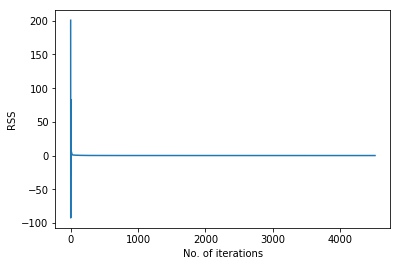

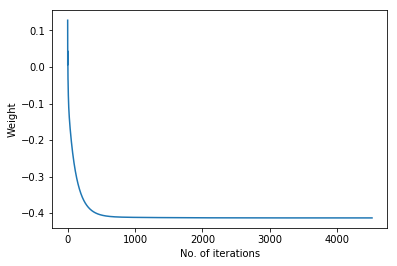

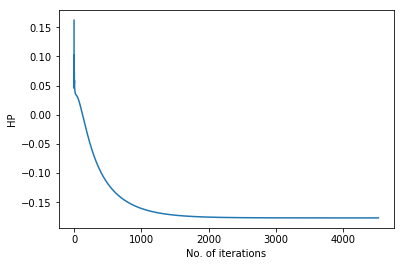

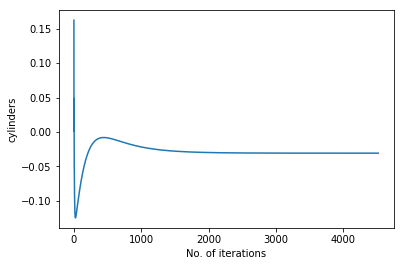

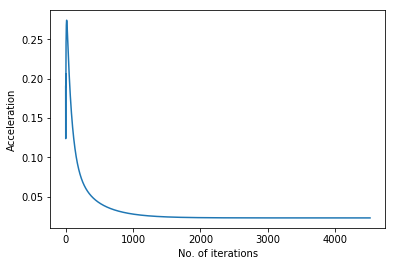

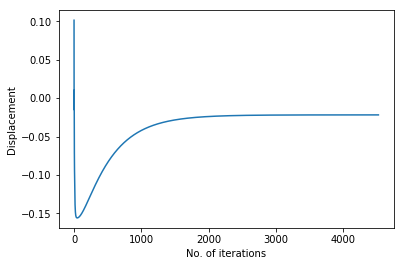

No. of iterations taken to converge to zero 4522
Coefficients of regression [[ 0.74651522]
 [-0.41302442]
 [-0.17701714]
 [-0.03071581]
 [ 0.02279493]
 [-0.0218489 ]]


In [133]:
# Initialize the predicting vector

predictor=np.array([[0],[0],[0],[0],[0],[0]])

#fix a step size
alpha=0.001
delta=1
tolerence=10**(-10)  
count=0           # Count the number of iterations
rss=[]            # List to store the values of RSS (Residual sum of Squares)
weights=[]        # List to store the values of weight
HP=[]             # List to store the values of Horsepower
cylinders=[]      #  List to store the values of Cylinders
Acceleration=[]   # List to store the values of Acceleration
Displacement=[]   #  List to store the values of Displacement

#Optimization
while np.sum(delta**2)>tolerence:
        delta=np.matmul(np.transpose(x),(y-np.matmul(x,predictor)))
        rss.append(delta[0])
        
        predictor=predictor-(-2)*alpha*delta
        weights.append(predictor[1])
        HP.append(predictor[2])
        cylinders.append(predictor[3])
        Acceleration.append(predictor[4])
        Displacement.append(predictor[5])
        count+=1
        
# count of number of iterations
iterations=[i for i in range(0,count)]

# Graph between iterations and RSS
plt.plot(iterations,rss)
plt.xlabel('No. of iterations')
plt.ylabel('RSS')
plt.show()

# Graph between iterations and Weight
plt.plot(iterations,weights)
plt.xlabel('No. of iterations')
plt.ylabel('Weight')
plt.show()

# Graph between iterations and Horsepower
plt.plot(iterations,HP)
plt.xlabel('No. of iterations')
plt.ylabel('HP')
plt.show()

# Graph between iterations and Cylinders
plt.plot(iterations,cylinders)
plt.xlabel('No. of iterations')
plt.ylabel('cylinders')
plt.show()

# Graph between iterations and Acceleration
plt.plot(iterations,Acceleration)
plt.xlabel('No. of iterations')
plt.ylabel('Acceleration')
plt.show()

# Graph between iterations and Displacement
plt.plot(iterations,Displacement)
plt.xlabel('No. of iterations')
plt.ylabel('Displacement')
plt.show()

        
print("No. of iterations taken to converge to zero",count)
# Printing the values of coefficients
print("Coefficients of regression",predictor)

#### Cross-checking for the values of coefficients 

In [137]:
# Cross check

model=stm.OLS(y,x).fit()

In [138]:
model.params

array([ 0.74651644, -0.41302691, -0.1770198 , -0.03071879,  0.02279491,
       -0.0218415 ])

##### Experimenting with different values of alpha i.e learning rate

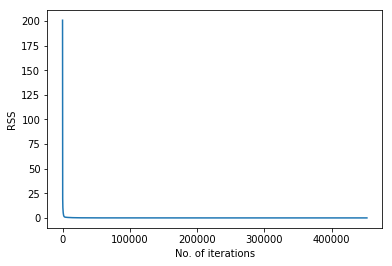

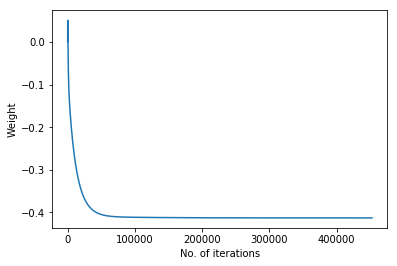

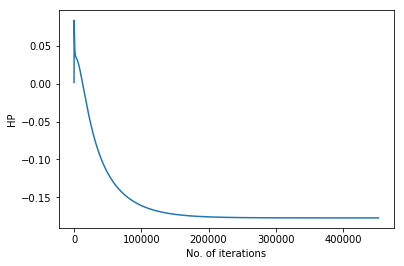

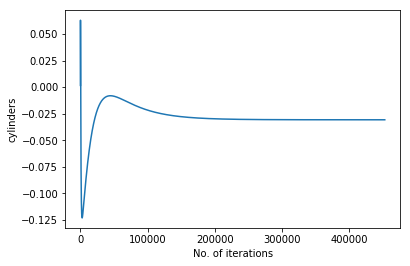

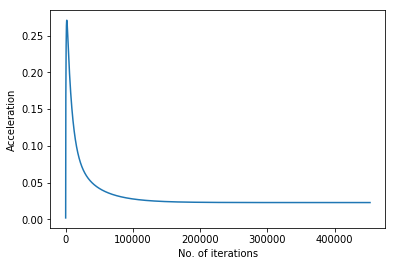

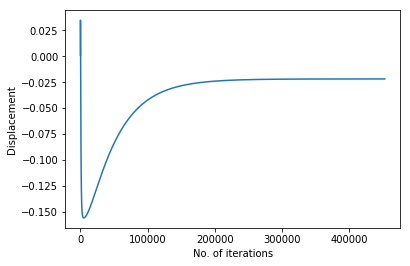

No. of iterations taken to converge to zero 452541
Coefficients of regression [[ 0.74651521]
 [-0.41302441]
 [-0.17701713]
 [-0.0307158 ]
 [ 0.02279494]
 [-0.02184893]]


In [139]:


predictor=np.array([[0],[0],[0],[0],[0],[0]])

#fix a step size
alpha=0.00001
delta=1
tolerence=10**(-10)
count=0
rss=[]
weights=[]
HP=[]
cylinders=[]
Acceleration=[]
Displacement=[]
#Optimization
while np.sum(delta**2)>tolerence:
        delta=np.matmul(np.transpose(x),(y-np.matmul(x,predictor)))
        #print(delta)
        rss.append(delta[0])
        
        predictor=predictor-(-2)*alpha*delta
        weights.append(predictor[1])
        HP.append(predictor[2])
        cylinders.append(predictor[3])
        Acceleration.append(predictor[4])
        Displacement.append(predictor[5])
        count+=1
iterations=[i for i in range(0,count)]
plt.plot(iterations,rss)
plt.xlabel('No. of iterations')
plt.ylabel('RSS')
plt.show()
plt.plot(iterations,weights)
plt.xlabel('No. of iterations')
plt.ylabel('Weight')
plt.show()
plt.plot(iterations,HP)
plt.xlabel('No. of iterations')
plt.ylabel('HP')
plt.show()
plt.plot(iterations,cylinders)
plt.xlabel('No. of iterations')
plt.ylabel('cylinders')
plt.show()
plt.plot(iterations,Acceleration)
plt.xlabel('No. of iterations')
plt.ylabel('Acceleration')
plt.show()
plt.plot(iterations,Displacement)
plt.xlabel('No. of iterations')
plt.ylabel('Displacement')
plt.show()

        
print("No. of iterations taken to converge to zero",count)
print("Coefficients of regression",predictor)

#### Observation

As the learning rate changes from 0.001 to 0.00001 the number of iterations changes from 4522 to  452541. It is clearly seen that with a smaller learning rate the number of iterations to converge to zero increase.
